In [2]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

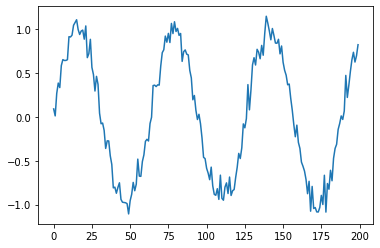

In [40]:
 # perfect sin + noise to prevent repetiton in trainig
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [41]:
# T = Number of timestamps to be used to predict the next step
T = 10
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  y = series[t+T]
  X.append(x)
  Y.append(y)

In [42]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

In [43]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss = 'mse', 
    optimizer = Adam(lr=0.1)
)

r = model.fit(
    X[:-N//2], Y[:-N//2], 
    epochs = 80, 
    validation_data =( X[N//2:], Y[N//2:])
)

Epoch 1/80
3/3 [==============================] - 0s 76ms/step - loss: 0.4092 - val_loss: 0.4204
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 0.3159 - val_loss: 0.1218
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1187 - val_loss: 0.0380
Epoch 4/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0490 - val_loss: 0.0590
Epoch 5/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0644 - val_loss: 0.0518
Epoch 6/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0681 - val_loss: 0.0536
Epoch 7/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0619 - val_loss: 0.0518
Epoch 8/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0442 - val_loss: 0.0312
Epoch 9/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0311 - val_loss: 0.0343
Epoch 10/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0280 - val_loss: 0.0208
Epoch 11/80
3/3 [============

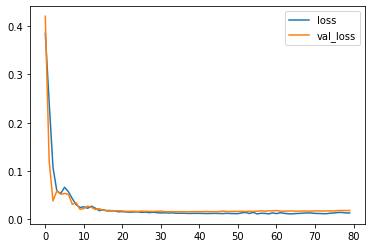

In [44]:
h = r.history
plt.plot(h['loss'], label='loss')
plt.plot(h['val_loss'], label='val_loss')
plt.legend()
plt.show()

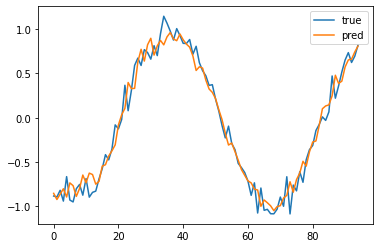

In [45]:
# wrong way 
true_values = Y[-N//2:]
pred_values = []

i = -N//2

while len(pred_values)<len(true_values):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i += 1
  pred_values.append(p)

plt.plot(true_values, label='true')
plt.plot(pred_values, label='pred')
plt.legend()
plt.show()

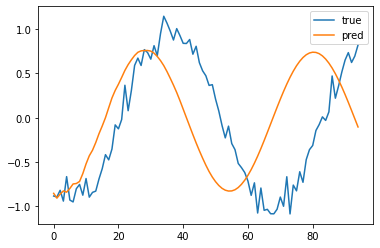

In [46]:
# auto regression 
true_values = Y[-N//2:]
pred_values = []
last_x = X[-N//2]

while len(pred_values)<len(true_values):
  p = model.predict(last_x.reshape(1,-1))[0,0]

  pred_values.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(true_values, label='true')
plt.plot(pred_values, label='pred')
plt.legend()
plt.show()